In [39]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt


from utils import (
    get_cluster_overview,
    append_mean_coefficients_per_cluster,
    get_mean_sentiment_corr,
)

pd.set_option("display.max_colwidth", None)

matrix = pd.read_json(
    "../graph_network/plots_graphs_or_dfs_archive/matrix_iv_29-04-24.json"
)
graph_clustering_shortest_path = pd.read_json("../graph_network/graph_clustering_shortest_path_03-05-24.json")
graph_clustering_e_b_c = pd.read_json("../graph_network/graph_clustering_edge_betweenness_centrality_03-05-24.json")
url_clustering_3 = pd.read_json("../graph_network/url_clustering_2_04-05-24.json")
url_clustering_4 = pd.read_json("../graph_network/url_clustering_3_04-05-24.json")

# Calculating the Correlation

In [12]:
get_mean_sentiment_corr(url_clustering_3, "group_id")

Num of Pages for Analysis:
 1591
Num of Clusters for Analysis:
 13


,negative,neutral,positive
avg_cluster_neg,0.390900,0.110600,-0.395513
avg_cluster_neu,0.116672,0.370557,-0.221508
avg_cluster_pos,-0.376997,-0.200150,0.410099


In [13]:
get_mean_sentiment_corr(url_clustering_4, "group_id")

Num of Pages for Analysis:
 1340
Num of Clusters for Analysis:
 20


,negative,neutral,positive
avg_cluster_neg,0.423186,0.100436,-0.418231
avg_cluster_neu,0.105733,0.401982,-0.218143
avg_cluster_pos,-0.407445,-0.201870,0.434388


In [14]:
get_mean_sentiment_corr(graph_clustering_shortest_path, "cluster_id")

Num of Pages for Analysis:
 1712
Num of Clusters for Analysis:
 11


,negative,neutral,positive
avg_cluster_neg,0.406102,0.057541,-0.396827
avg_cluster_neu,0.062621,0.373152,-0.177506
avg_cluster_pos,-0.389331,-0.160023,0.413921


In [15]:
get_mean_sentiment_corr(graph_clustering_e_b_c, "commun_id")

Num of Pages for Analysis:
 1693
Num of Clusters for Analysis:
 7


,negative,neutral,positive
avg_cluster_neg,0.349680,0.181175,-0.383038
avg_cluster_neu,0.217590,0.291159,-0.294868
avg_cluster_pos,-0.343628,-0.220260,0.389784


# Calculating the Cluster Variance
Clusters >= 10 Pages

In [25]:
def get_cluster_variance(clustering, cluster_col):
    df = get_cluster_overview(clustering, cluster_col)
    print("\nNUMBERS ABOVE ARE NOT TRUE FOR THESE FOLLOWING STATS!!!")
    print("mean var_neg", round(df[df[f"{cluster_col[:-3]}_size"]>=10]["var_neg"].mean(), 4)) 
    print("mean var_neu", round(df[df[f"{cluster_col[:-3]}_size"]>=10]["var_neu"].mean(), 4)) 
    print("mean var_pos", round(df[df[f"{cluster_col[:-3]}_size"]>=10]["var_pos"].mean(), 4)) 

In [22]:
get_cluster_variance(url_clustering_3, "group_id")

Numbers of usable Clusters: 17 
 containing: 1612 Pages/Nodes.

NUMBERS ABOVE ARE NOT TRUE FOR THESE FOLLOWING STATS!!!
mean var_neg 0.0131
mean var_neu 0.0014
mean var_pos 0.014


In [23]:
get_cluster_variance(url_clustering_4, "group_id")

Numbers of usable Clusters: 60 
 containing: 1500 Pages/Nodes.

NUMBERS ABOVE ARE NOT TRUE FOR THESE FOLLOWING STATS!!!
mean var_neg 0.0108
mean var_neu 0.0016
mean var_pos 0.0125


In [26]:
get_cluster_variance(graph_clustering_shortest_path, "cluster_id")

Numbers of usable Clusters: 12 
 containing: 1718 Pages/Nodes.

NUMBERS ABOVE ARE NOT TRUE FOR THESE FOLLOWING STATS!!!
mean var_neg 0.0143
mean var_neu 0.0019
mean var_pos 0.0148


In [27]:
get_cluster_variance(graph_clustering_e_b_c, "commun_id")

Numbers of usable Clusters: 15 
 containing: 1713 Pages/Nodes.

NUMBERS ABOVE ARE NOT TRUE FOR THESE FOLLOWING STATS!!!
mean var_neg 0.0147
mean var_neu 0.0019
mean var_pos 0.0148


# Plot Cluster Overview

Numbers of usable Clusters: 60 
 containing: 1500 Pages/Nodes.


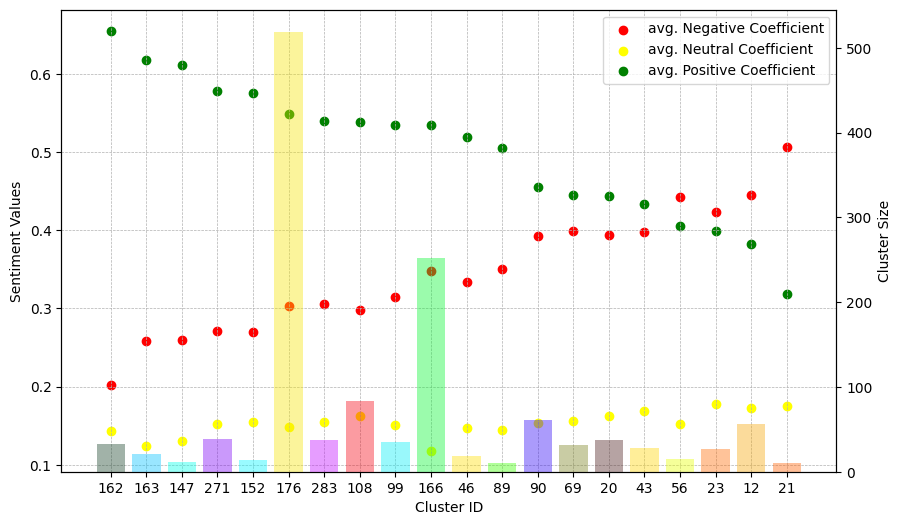

In [40]:
def get_overview_plot(df, cluster_col):
    df = get_cluster_overview(df, cluster_col)
    df = df[df[f"{cluster_col[:-3]}_size"]>=10].sort_values("avg_pos", ascending=False)
    df[cluster_col] = df[cluster_col].astype(str)
    fig, ax1 = plt.subplots(figsize=(10, 6))

    for group in df[cluster_col].unique():
        group_data = df[df[cluster_col] == group]
        ax1.scatter([group]*len(group_data), group_data['avg_neg'], color='red', label='avg. Negative Coefficient' if group == df[cluster_col].unique()[0] else "")
        ax1.scatter([group]*len(group_data), group_data['avg_neu'], color='yellow', label='avg. Neutral Coefficient' if group == df[cluster_col].unique()[0] else "")
        ax1.scatter([group]*len(group_data), group_data['avg_pos'], color='green', label='avg. Positive Coefficient' if group == df[cluster_col].unique()[0] else "")

    ax1.set_xlabel('Cluster ID')
    ax1.set_ylabel('Sentiment Values')
    ax1.legend()
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

    ax2 = ax1.twinx()
    ax2.bar(df[cluster_col], df[f"{cluster_col[:-3]}_size"], color=df[f"color_{cluster_col}"], alpha=0.4, width=0.8)
    ax2.set_ylabel('Cluster Size')

get_overview_plot(url_clustering_4, "group_id")

## Plot Variance

In [41]:
def get_usable_clusters(df, cluster_col, coefficient_names):
    std_dev = df.groupby(cluster_col)[coefficient_names].std()
    return std_dev[(std_dev["neutral"].notnull()) & (std_dev["neutral"] != 0)]

# df = graph_clustering_e_b_c
cluster_col = "group_id"

def get_filtered_df(df, cluster_col):
    coefficient_names = ["negative", "neutral", "positive"]
    usable_values = get_usable_clusters(df, cluster_col, coefficient_names)
    cluster_sizes = df[cluster_col].value_counts()
    large_clusters = cluster_sizes[cluster_sizes >= 10].index
    return df[(df[cluster_col].isin(usable_values.index)) & (df[cluster_col].isin(large_clusters))][['negative', 'neutral', 'positive', cluster_col, f'color_{cluster_col}']]
    
df = get_filtered_df(url_clustering_4, "group_id")

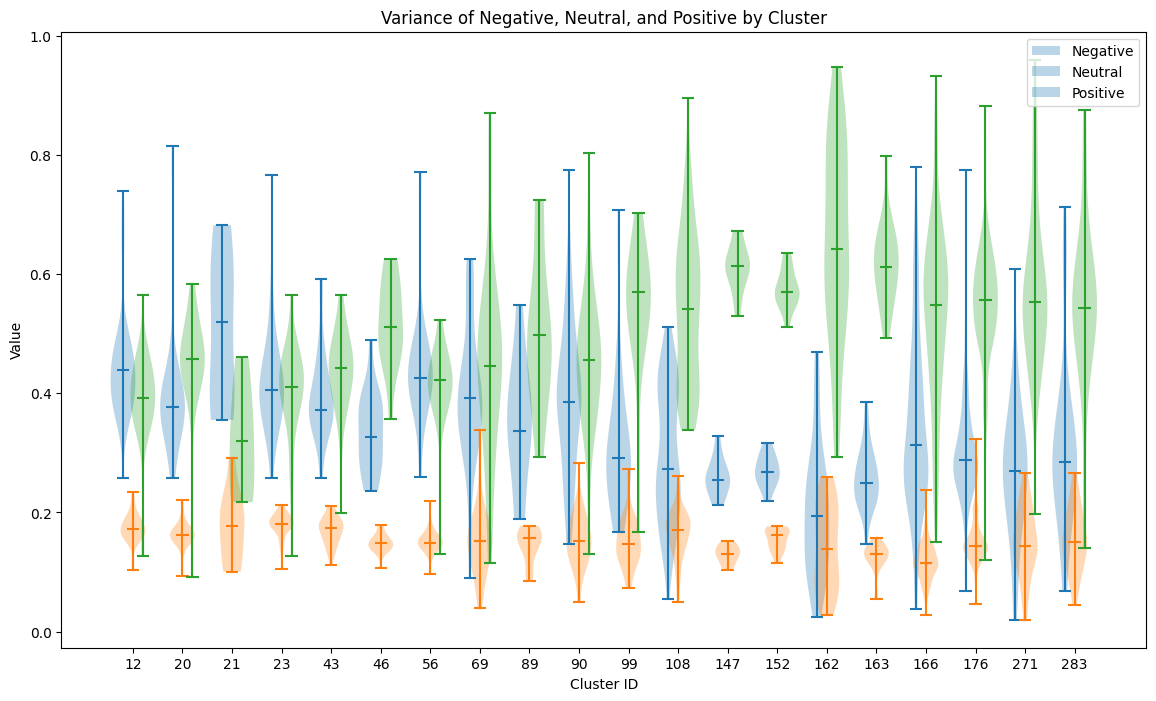

In [42]:
groups = df[cluster_col].unique()
negative_data = [df[df[cluster_col] == group]['negative'] for group in groups]
neutral_data = [df[df[cluster_col] == group]['neutral'] for group in groups]
positive_data = [df[df[cluster_col] == group]['positive'] for group in groups]

# Violinplot erstellen
fig, ax = plt.subplots(figsize=(14, 8))

positions = np.arange(len(groups))
width = 0.2

ax.violinplot(negative_data, positions=positions - width, showmeans=False, showmedians=True)
ax.violinplot(neutral_data, positions=positions, showmeans=False, showmedians=True)
ax.violinplot(positive_data, positions=positions + width, showmeans=False, showmedians=True)

# Anpassungen für bessere Lesbarkeit
ax.set_xticks(positions)
ax.set_xticklabels(groups)
ax.set_xlabel('Cluster ID')
ax.set_ylabel('Value')
ax.set_title('Variance of Negative, Neutral, and Positive by Cluster')
ax.legend(['Negative', 'Neutral', 'Positive'])

plt.show()

# Finding most positive and most negative Cluster

In [29]:
df = get_cluster_overview(url_clustering_4, "group_id")
df[df["group_size"]>=10].sort_values("avg_neg", ascending=False)

Numbers of usable Clusters: 60 
 containing: 1500 Pages/Nodes.


,group_id,avg_neg,avg_neu,avg_pos,var_neg,var_neu,var_pos,group_size,color_group_id
8,21,0.506382,0.174924,0.318694,0.016579,0.003646,0.008008,10,#ff5f00
6,12,0.445147,0.172697,0.382155,0.008037,0.000618,0.006951,56,#f5a505
19,56,0.441853,0.152296,0.405852,0.010573,0.000590,0.006792,15,#e8ff00
9,23,0.422593,0.178324,0.399083,0.008846,0.000479,0.007048,27,#ff6a00
23,69,0.398479,0.156275,0.445246,0.014877,0.004110,0.024379,31,#79801d
13,43,0.397094,0.169381,0.433525,0.005378,0.000581,0.005226,28,#ffd500
7,20,0.393783,0.162036,0.444181,0.010981,0.000518,0.009139,37,#4a1a1a
27,90,0.392231,0.153076,0.454693,0.015766,0.002110,0.013559,61,#2d05f7
26,89,0.350393,0.145070,0.504538,0.011972,0.000935,0.017593,10,#3dff00
40,166,0.347778,0.118015,0.534207,0.022824,0.001118,0.023513,252,#05f531


## most positive

In [30]:
most_positive_idx = df[df["group_size"]>=10][["avg_neg","avg_pos"]].diff(axis=1)["avg_pos"].idxmax()
most_positive = df.loc[most_positive_idx, 'group_id']
most_positive

162

In [31]:
df[df["group_id"]==most_positive]

,group_id,avg_neg,avg_neu,avg_pos,var_neg,var_neu,var_pos,group_size,color_group_id
38,162,0.202366,0.142634,0.655,0.011931,0.004922,0.027339,33,#144026


In [32]:
url_clustering_4[url_clustering_4["group_id"]==most_positive][["url_elements_list"]][:10]

,url_elements_list
431,"[www.mobiliar.ch, die-mobiliar, ueber-uns, sponsoring-und-events, sport, unser-engagement-fuer-den-hallensport]"
432,"[www.mobiliar.ch, die-mobiliar, ueber-uns, sponsoring-und-events, sport, schwingen]"
482,"[www.mobiliar.ch, die-mobiliar, ueber-uns, sponsoring-und-events, sport, unser-engagement-fuer-den-hallensport, mobiliar-supercup]"
483,"[www.mobiliar.ch, die-mobiliar, ueber-uns, sponsoring-und-events, sport, indoor-sports, mobiliar-topscorer]"
484,"[www.mobiliar.ch, die-mobiliar, ueber-uns, sponsoring-und-events, sport, indoor-sports, nachwuchs-engagement]"
485,"[www.mobiliar.ch, die-mobiliar, ueber-uns, sponsoring-und-events, sport, superkraft-spielfreude]"
486,"[www.mobiliar.ch, die-mobiliar, ueber-uns, sponsoring-und-events, sport, impressionen-pratteln-2022]"
487,"[www.mobiliar.ch, die-mobiliar, ueber-uns, sponsoring-und-events, sport]"
490,"[www.mobiliar.ch, die-mobiliar, ueber-uns, sponsoring-und-events, sport, indoor-sports, lokales-engagement]"
495,"[www.mobiliar.ch, die-mobiliar, ueber-uns, sponsoring-und-events, sport, indoor-sports, die-vier-indoor-sportarten]"


## most negative

In [36]:
most_negative_idx = df[df["group_size"]>=10][["avg_neg","avg_pos"]].diff(axis=1)["avg_pos"].idxmin()
most_negative = df.loc[most_negative_idx, 'group_id']
most_negative

21

In [34]:
df[df["group_id"]==most_negative]

,group_id,avg_neg,avg_neu,avg_pos,var_neg,var_neu,var_pos,group_size,color_group_id
8,21,0.506382,0.174924,0.318694,0.016579,0.003646,0.008008,10,#ff5f00


In [35]:
url_clustering_4[url_clustering_4["group_id"]==most_negative][["url_elements_list"]][:10]

,url_elements_list
21,"[www.mobiliar.ch, versicherungen-und-vorsorge, services, mobiliar-digital, das-meine-mobiliar-kundenportal]"
296,"[www.mobiliar.ch, versicherungen-und-vorsorge, services, mobiliar-digital, das-meine-mobiliar-kundenportal]"
917,"[www.mobiliar.ch, versicherungen-und-vorsorge, services, mobiliar-digital, das-meine-mobiliar-kundenportal, faqs-und-support-rund-um-meine-mobiliar]"
931,"[www.mobiliar.ch, versicherungen-und-vorsorge, services, mobiliar-digital]"
982,"[www.mobiliar.ch, versicherungen-und-vorsorge, services, mobiliar-digital, e-rechnung]"
987,"[www.mobiliar.ch, versicherungen-und-vorsorge, services, mobiliar-digital, kundenportal-meine-mobiliar, faqs-und-support-rund-um-meine-mobiliar, sub-user-erfassen-nur-fuer-firmenkunden]"
993,"[www.mobiliar.ch, versicherungen-und-vorsorge, services, mobiliar-digital, das-meine-mobiliar-kundenportal, benachrichtigung-auswaehlen]"
994,"[www.mobiliar.ch, versicherungen-und-vorsorge, services, mobiliar-digital, kundenportal-meine-mobiliar, faqs-und-support-rund-um-meine-mobiliar, login]"
995,"[www.mobiliar.ch, versicherungen-und-vorsorge, services, mobiliar-digital, das-meine-mobiliar-kundenportal, vollmachten-beantragen-nur-kundenportal]"
996,"[www.mobiliar.ch, versicherungen-und-vorsorge, services, mobiliar-digital, das-meine-mobiliar-kundenportal, registrierung]"
